In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\thear\Downloads\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
left=df[df.left ==1]
left.shape

(3571, 10)

In [7]:
retained = df[df.left ==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

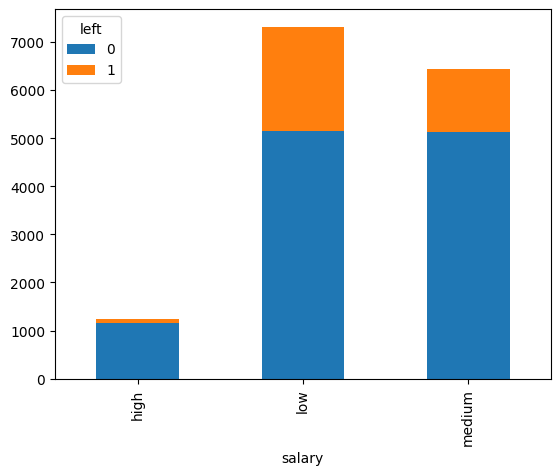

In [27]:
pd.crosstab(df.salary,df.left).plot(kind='bar',stacked='True')

<Axes: xlabel='Department'>

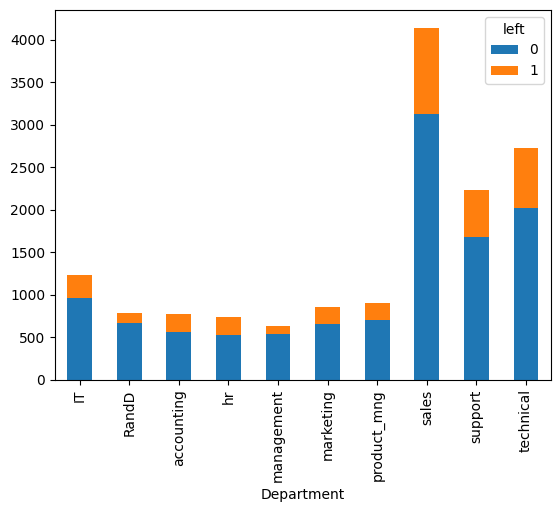

In [28]:
pd.crosstab(df.Department,df.left).plot(kind='bar',stacked='True')

In [31]:


subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()



,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [42]:
dummiessal=pd.get_dummies(df.salary,prefix="salary")
dummiessal=dummiessal.replace({True:1,False:0})
dummiesdep=pd.get_dummies(df.Department)
dummiesdep=dummiesdep.replace({True:1,False:0})

In [51]:
df=pd.concat([df,dummiessal,dummiesdep],axis=1)

In [50]:
df=df.drop(['Department','salary'],axis=1)

In [55]:
x=df.drop(['left'],axis=1)
y=df['left']

In [57]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(x,y,test_size=0.2)

In [58]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()

In [60]:
lr.fit(X_train,y_train)

C:\Software\PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [62]:
lr.score(X_test,y_test)

0.7986666666666666

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [29]:
x=df.drop(['left'],axis=1)
y=df['left']


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('salary',OneHotEncoder(),[9])],remainder='passthrough')
ct=ColumnTransformer([('Department',OneHotEncoder(),[8])],remainder='passthrough')

In [40]:
x=ct.fit_transform(x)


In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
lr.fit(x,y)

C:\Software\PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lr.score(x,y)

0.8476565104340289